# Overview

This Project uses **Natural Language Processing** on Yelp Restaurant Reviews in order to create features that can be used for the various Recommendation System Models.

Using **Sentiment Analysis** Packages like `Textblob` and `VADER`, we can analyze text reviews to derive further quantitative metrics on a user's overall sentiment and review of a restaurant visit. Combining sentiment scores with rating scores from reviews, we hope to build out a super score that better reflects a user's overall experience and feeling towards a restaurant. This super score will be used in our **Collaborative Filtering Recommendation System.**

This project will also incorporate **Topic Modelling (LDA)** to further classify text reviews based on several dominant topics. By identfying common key words in different dominant topics, we will use these key words in our **Content Based Recommendation System.**

Lastly, this project will use the longitude and latitude points of restaurants to build a **Location Based Recommendation System** and cluster restaurants together using the **K-Means Clustering Algorithm.**

# Explanatory Data Analysis

In [ ]:
!pip install plotly_express

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install stylecloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.1/262.1 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.4/161.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 kB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stylecloud: filename=stylecloud-0.5.2-py3-none-any.whl size=259494 sha256=dc43e23e4db3b6f67e45a27660fd7d32bffc223ad88f772a8e02cf16f73aafa9
  Stored in directory: /root/.cache/pip/wheels/aa/c8/27/9374f4fc7133015d902b5e2c75ad951edd57eb1ae948495915
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=22e83d87fa8e72a4431d0df4a3ddad8b68b86194afc6b1464a7f54f028bdcf6c
  Stored in directory: /root/.cache/pip/wheels/90/d

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
pip install --upgrade gensim

In [ ]:
## Importing Basic Packages
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sys
pd.set_option('display.max_columns', 50)

# Import Plotly Packages
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly_express as px
from plotly.offline import init_notebook_mode, plot, iplot


## sklearn Packages
import sklearn
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# Import NLP Packages
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import stylecloud

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
#from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel


## Reading in CSV Files

In [ ]:
# Reading in Restaurant Businesses Final CSV File

business_final = pd.read_csv("/content/drive/MyDrive/UnstructuredData/DataMavericks/business_final.csv")
business_final.drop(['Unnamed: 0'], axis=1, inplace = True)
print(business_final.shape)
business_final.head(3)

(1641, 12)


,business_id,name,city,state,stars,review_count,categories,latitude,longitude,is_open,postal_code,key
0,anLQj9AM8vjbcLSIE0iUgg,Papa Murphy's,Tucson,AZ,4.0,22,"Pizza, Restaurants",32.338572,-111.010760,1,85741.0,anLQj9AM8vjbcLSIE0iUgg
1,9C2rpb56aQvW0ViZHK9sPw,Home Plate Sports Pub,Tucson,AZ,3.5,56,"Bars, Restaurants, Sports Bars, Nightlife",32.206315,-110.887843,1,85711.0,9C2rpb56aQvW0ViZHK9sPw
2,Y6heWJJ9AmEL58fZwgi9YQ,Rosati's Pizza,Tucson,AZ,4.0,58,"Sports Bars, Bars, Nightlife, Italian, Restaur...",32.338724,-111.030310,1,85741.0,Y6heWJJ9AmEL58fZwgi9YQ


In [ ]:
# Reading in Reviews Final CSV File

reviews_final = pd.read_csv("/content/drive/MyDrive/UnstructuredData/DataMavericks/reviews_final.csv")
reviews_final.drop(['Unnamed: 0'], axis=1, inplace = True)
#Drop key column as it contains the same values in the user_id column
reviews_final.drop(['key'], axis=1, inplace = True)
print(reviews_final.shape)
reviews_final.head(3)

(181099, 11)


,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time
0,YjUWPpI6HXG530lwP-fb2A,8g_iMtfSiwikVnbP2etR0A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,2014,2,20:30:30
1,5Ce3lZksYVkCbrihqylVHQ,yZdAhQ_KmKuCZmbBy9YDQg,5.0,0,0,0,I just started going to Sushi Nara this month ...,2014-07-25 17:56:26,2014,7,17:56:26
2,7L1kXfwU5XM6f6Jxo_L7Yg,hToW2eoTAYlOcuNz7I73Cg,5.0,1,0,0,We've been coming here since I was a kid. The ...,2015-07-03 22:36:04,2015,7,22:36:04


In [ ]:
# Reading in Users Final CSV File

users_final = pd.read_csv("/content/drive/MyDrive/UnstructuredData/DataMavericks/users_final.csv")
users_final.drop(['Unnamed: 0'], axis=1, inplace = True)
print(users_final.shape)
users_final.head(3)

(44178, 10)


,user_id,user_name,user_review_count,user_yelp_since,friends,useful_reviews,funny_reviews,cool_reviews,n_fans,average_stars
0,x7YtLnBW2dUnrrpwaofVQQ,Ronskee,37,2010-05-06 00:40:56,"EPBLDry-ObheloH-NuvbvQ, 0GHsxjCk-Ynzx4Ihj8tjPQ...",56,29,29,9,3.84
1,XLs_PhrJ7Qwn_RfgMM7Djw,Weili,90,2009-07-12 14:34:54,"gTX68_Us2eI2KjY21aOQ7g, e4nHt3ErihX7II-MHXVM1w...",71,21,19,1,3.62
2,QJI9OSEn6ujRCtrX06vs1w,J,1982,2007-03-19 18:15:32,"RyPeT_ICAtX8ah9dhDpEFw, W8r4aKPZFT3GPIQQDbqB6Q...",14004,6466,9879,316,3.61


## EDA on Reviews Data

In [ ]:
reviews_final['text'].head()

0    Family diner. Had the buffet. Eclectic assortm...
1    I just started going to Sushi Nara this month ...
2    We've been coming here since I was a kid. The ...
3    Blew $80 on food for the family was worth it f...
4    This is my favorite restaurant!  I always orde...
Name: text, dtype: object

To further make sense of the data in our reviews dataset, we will be performing sentiment analysis on the text content of the reviews to understand user sentiment on their overall emotional experience dining at different restaurants.

Based on the overal reviews distribution plot in the previous section, we will be classifying negative reviews as those whose Star/Rating was `1` or `2` while classifying positive reviews as those whose Star/Rating was `4` or `5`. The remainder of the reviews whose Star/Rating was `3` will be classified as neutral reviews.

## Negative Reviews

In [ ]:
# Filtering for negative reviews (one and two star)

one_star_reviews = reviews_final[reviews_final['stars'] == 1.0]
two_star_reviews = reviews_final[reviews_final['stars'] == 2.0]
negative_reviews = [one_star_reviews, two_star_reviews]
negative_reviews = pd.concat(negative_reviews)
print(negative_reviews.shape)
negative_reviews.sample(3)

(40969, 11)


,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time
173898,JFteGsQlrJeJjur6cA1RhA,L4MUTdrkhEP71Oq0DbmoNQ,2.0,2,0,0,First time here. Went there for breakfast and ...,2018-08-26 18:01:55,2018,8,18:01:55
131010,RMdFwixigcN-9_INV3LlqA,9W4zFxQ8DaNXiQ_4G_MdQg,2.0,0,1,0,I stopped in for a quick breakfast on a Wednes...,2016-04-01 05:23:08,2016,4,05:23:08
100167,j0rlSVLbW1vCnMtfFsGmYQ,Ueg4TgIGN6qe2WuUf6JfVw,1.0,2,0,0,This is the second year I we have used this lo...,2017-09-09 20:47:20,2017,9,20:47:20


We have `40,969` rows of reviews data classified as **Negative Reviews.**

In [ ]:
## Sentiment Analysis for Negative Reviews

def plot_10_most_common_words(count_data, count_vectorizer):
    # Get feature names directly from the CountVectorizer object
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts += t.toarray()[0]

    count_dict = dict(zip(words, total_counts))
    sorted_count_dict = sorted(count_dict.items(), key=lambda x: x[1], reverse=True)[:10]
    words = [w[0] for w in sorted_count_dict]
    counts = [w[1] for w in sorted_count_dict]
    x_pos = np.arange(len(words))

    plt.figure(figsize=(15, 6))
    plt.bar(x_pos, counts, color='skyblue')
    plt.xticks(x_pos, words, rotation=45)
    plt.xlabel('Words')
    plt.ylabel('Counts')
    plt.title('10 most common words for negative reviews')
    plt.show()

Words like `food`, `like`, `good`, `restaurant`, `place` are freqeuent words in negative reviews but on their own they are not very informative about the sentiment of negative reviews. Hence, we will look to remove these words before plotting our word cloud.

In [ ]:
# Let's use the stop_words argument to remove words like "and, the, a"

import nltk
# Import the stopwords module with a different name, for example, stopwords_nltk
from nltk.corpus import stopwords as stopwords_nltk

stop_words_list = stopwords_nltk.words('english')
cvec = CountVectorizer(min_df=2, stop_words=stop_words_list, max_features=1000)
cvec.fit(negative_reviews['text'])

# Transforming using our fitted cvec and converting the result to a DataFrame
negative_words = pd.DataFrame(cvec.transform(negative_reviews['text']).todense(),
                              columns=cvec.get_feature_names_out())

negative_top = negative_words.sum(axis=0).sort_values(ascending=False).head(150)
negative_pd = pd.DataFrame(data=negative_top)
negative_top = negative_words[negative_pd.index]
negative_top.drop(columns=['food', 'like', 'restaurant', 'place', 'good'], inplace=True)
negative_top.head()


<ipython-input-25-37b01819c12b>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,service,order,time,one,back,get,us,ordered,would,go,got,even,minutes,never,said,came,asked,really,went,told,could,chicken,table,first,two,...,next,30,tried,looked,lunch,home,drive,waiter,quality,tables,maybe,thing,busy,sandwich,best,hot,anything,however,seated,used,else,arrived,business,gave,husband
0,1,0,1,2,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,7,2,2,1,1,4,1,2,0,3,0,7,2,4,4,2,0,0,2,3,0,0,0,0,...,2,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,0,1,1,1,0,1,0,2,1,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
negative_reviews['counter'] = 1
negative_reviews.head()

In [ ]:
# Sorting Restaurants based on number of reviews

negative_reviews.groupby('business_id')['counter'].sum().sort_values(ascending = False)

business_id
LZzDvgfpkd4nI3E4L9wF1w    369
wj8XtPyuREj8_0GQz3LZ6w    273
LmZWlvPJBwj5WG2KHV-v1Q    240
U782dba0FoFLi3cmXbo88Q    232
h2-mPUMYJ5pF_gVurDL3lw    227
                         ... 
Kgbj_vB2pfxdClrLhfnlbQ      1
9m1JbtVcXPJKglKUnr1_Fg      1
MsyU6whjANQJScSEYZjvYA      1
jXcreX-lGmPYVEr2RQhuww      1
n9kqlp48MzXB--LKoRjQhA      1
Name: counter, Length: 1565, dtype: int64

In [ ]:
# Restaurant with most negative reviews

worst_restaurant = business_final[business_final['business_id '] == 'LZzDvgfpkd4nI3E4L9wF1w']
worst_restaurant

,business_id,name,city,state,stars,review_count,categories,latitude,longitude,is_open,postal_code,key
543,LZzDvgfpkd4nI3E4L9wF1w,El Charro Cafe,Tucson,AZ,3.5,1583,"Tapas/Small Plates, Desserts, Cocktail Bars, N...",32.225713,-110.974624,1,85701.0,LZzDvgfpkd4nI3E4L9wF1w


In [ ]:
# Filtering Reviews from the Worst Restaurant

worst_restaurant_reviews = negative_reviews[negative_reviews['business_id'] == 'LZzDvgfpkd4nI3E4L9wF1w']
worst_restaurant_reviews.head()

,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time,counter
55722,LZzDvgfpkd4nI3E4L9wF1w,Kx9d1-FC-kn3pdK7x6PEdw,1.0,5,5,0,BEWARE IF YOU ARE A VEGAN OR ORDERING A VIRGIN...,2016-05-21 01:13:35,2016,5,01:13:35,1
55759,LZzDvgfpkd4nI3E4L9wF1w,M2o5oHXRARVM1uSXbxHN8w,1.0,1,0,0,This restaurant is recommended highly in Tripa...,2017-10-27 00:42:28,2017,10,00:42:28,1
55826,LZzDvgfpkd4nI3E4L9wF1w,s96Ronc70cCMvGWZRo6_LQ,1.0,0,0,0,We headed straight to the host for a table and...,2014-01-02 01:30:51,2014,1,01:30:51,1
55873,LZzDvgfpkd4nI3E4L9wF1w,tuSsfBRfA5nOmmwkH8m23w,1.0,0,0,0,"We were here last night for a birthday party, ...",2015-07-28 16:48:30,2015,7,16:48:30,1
56037,LZzDvgfpkd4nI3E4L9wF1w,sD2B1F00BbustFzWKP1mew,1.0,0,0,0,Server was rude ad smug. Informing us that the...,2015-11-19 01:15:27,2015,11,01:15:27,1


In [ ]:
column_list = list(negative_top)
negative_words = negative_top[column_list].sum(axis=0)
negative_words = negative_words.to_frame(name = 'sum').reset_index()
negative_words.set_index('index',inplace = True)
negative_words.to_csv("/content/drive/MyDrive/UnstructuredData/DataMavericks/negative_words.csv")

In [ ]:
negative_words.shape

(300, 1)

## Positive Reviews

In [ ]:
# Filtering for positive reviews (five and four star)

fivestar_reviews = reviews_final[reviews_final['stars'] == 5.0]
fourstar_reviews = reviews_final[reviews_final['stars'] == 4.0]
positive_reviews = [fourstar_reviews, fivestar_reviews]
positive_reviews = pd.concat(positive_reviews)
print(positive_reviews.shape)
positive_reviews.sample(5)

(121594, 11)


,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time
5917,aq26RY75PlTNsviW6wUC9A,NOHMdu9qzOxaFC1NMt9L6Q,5.0,1,0,0,"Best wings in town, ask for CAT outstanding se...",2019-02-28 01:29:03,2019,2,01:29:03
156357,2Gn5gGPzLWQLciodalz6WA,srx_nUpba8cwwzdcZunaCA,4.0,0,0,0,I decided to choose this food truck at the Tuc...,2019-02-10 00:16:03,2019,2,00:16:03
123593,0VLvj_tqDWATqb9ThA-XiA,askDKzGw1SLME61pHERf9g,5.0,0,0,3,"First timer, not experienced with ""Indian cuis...",2017-08-30 03:46:56,2017,8,03:46:56
21288,iBnj2wBO5-3moZ7corhp-w,SoMCvtVtA__hzRkv6aS3Xw,4.0,0,2,0,So-so rude experience (and desperately need a ...,2014-08-02 07:36:36,2014,8,07:36:36
149134,42BmFLsm1YAommyVHYxV5Q,X6TmCjx5FJxSC03smDSvsQ,5.0,1,0,1,Been coming here since it opened has not ever ...,2016-10-08 03:57:11,2016,10,03:57:11


We have `121,594` rows of reviews data classified as **Positive Reviews.**

<ipython-input-40-f1c0a021c0cd>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




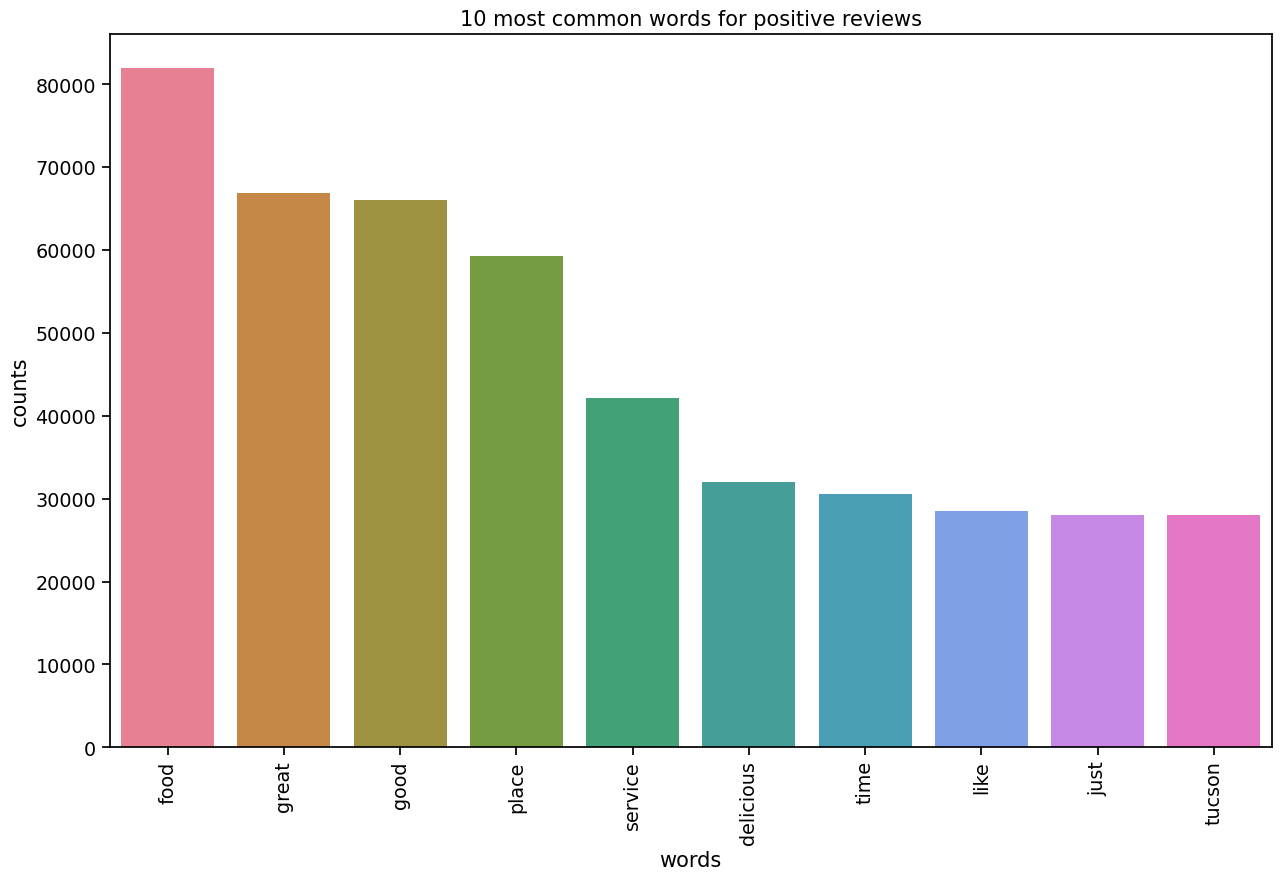

In [ ]:
def plot_10_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts += t.toarray()[0]

    count_dict = dict(zip(words, total_counts))
    sorted_count_dict = sorted(count_dict.items(), key=lambda x: x[1], reverse=True)[:10]
    words = [w[0] for w in sorted_count_dict]
    counts = [w[1] for w in sorted_count_dict]
    x_pos = np.arange(len(words))

    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words for positive reviews')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x=x_pos, y=counts, palette='husl')  # Use keyword arguments for x and y
    plt.xticks(x_pos, words, rotation=90)
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

## Sentiment Analysis for high rated reviews
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(positive_reviews['text'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [ ]:
# Let's use the stop_words argument to remove words like "and, the, a"
cvec = CountVectorizer(min_df = 2, stop_words= 'english', max_features = 1000)

cvec.fit(positive_reviews['text'])

positive_words = pd.DataFrame(cvec.transform(positive_reviews['text']).todense(),
                       columns=cvec.get_feature_names_out())

positive_top = positive_words.sum(axis = 0).sort_values(ascending = False).head(100)
positive_pd = pd.DataFrame(data=positive_top)
positive_top = positive_words[positive_pd.index]
positive_top.drop(columns=['food','like', 'restaurant', 'place', 'really'], inplace = True)
positive_top.head()

<ipython-input-42-920351bfe323>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,great,good,service,delicious,time,just,tucson,best,love,ve,friendly,amazing,nice,definitely,try,staff,ordered,menu,chicken,got,order,fresh,little,pizza,come,...,table,going,better,coffee,salsa,location,worth,family,loved,bread,want,server,know,mexican,say,clean,spot,prices,visit,small,home,wonderful,enjoyed,rice,meat
0,2,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
positive_reviews['counter'] = 1
positive_reviews.head()

,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time,counter
7,otQS34_MymijPTdNBoBdCw,17jzGkFYCvB5Q0fjJEzVAA,4.0,0,0,0,I was told this place is a must for a Sonoran ...,2017-06-17 17:17:29,2017,6,17:17:29,1
8,UCMSWPqzXjd7QHq7v8PJjQ,_l0csyXqNIcb3vG-1qR8DQ,4.0,0,0,0,I really like Prep & Pastry - we have been twi...,2017-09-20 18:19:33,2017,9,18:19:33,1
10,7L1kXfwU5XM6f6Jxo_L7Yg,mC-khOW9EOrKHTeXkrb5rg,4.0,0,0,0,Came here on a Monday at lunch time. I sat at ...,2017-08-07 19:52:42,2017,8,19:52:42,1
14,UCMSWPqzXjd7QHq7v8PJjQ,GU_4tHnCYE6aKGU2XH-zkA,4.0,0,0,0,Tasty selection and very preppy! \n\nOne canno...,2015-11-18 20:39:24,2015,11,20:39:24,1
15,CA5BOxKRDPGJgdUQ8OUOpw,Qn6Rtn8JbsFiniy_4dA7bw,4.0,0,0,0,"Food was fresh and tasted great, nothing amazi...",2015-04-01 15:38:03,2015,4,15:38:03,1


In [ ]:
# Sorting Restaurants Based on Most Reviews

positive_reviews.groupby('business_id')['counter'].sum().sort_values(ascending = False)

business_id
UCMSWPqzXjd7QHq7v8PJjQ    1896
hyeo7JQr5uLp-St1MibYAA    1016
WSx9-iYYyST_umny9sJBFg    1000
zZ01WQlcpI1_n806WKV3bA     917
j8feOxyJqlIJWOi8su2qzw     853
                          ... 
_eJMx6Uwfi5CYcXxPsoZNA       1
OQtiglitfleC-roso3jXDw       1
i3yvDbVSdswR88fiFX5VYA       1
iMxWIHjEXeoHsTVMDmMT7A       1
BzvTRpQ51IZ6N1_o7EjFlA       1
Name: counter, Length: 1622, dtype: int64

In [ ]:
# Restaurant with most positive reviews

best_restaurant = business_final[business_final['business_id '] == 'UCMSWPqzXjd7QHq7v8PJjQ']
best_restaurant

,business_id,name,city,state,stars,review_count,categories,latitude,longitude,is_open,postal_code,key
24,UCMSWPqzXjd7QHq7v8PJjQ,Prep & Pastry,Tucson,AZ,4.5,2126,"Restaurants, Cocktail Bars, Bars, Comfort Food...",32.255528,-110.943492,1,85719.0,UCMSWPqzXjd7QHq7v8PJjQ


In [ ]:
best_restaurant_reviews = positive_reviews[positive_reviews['business_id'] == 'UCMSWPqzXjd7QHq7v8PJjQ']
best_restaurant_reviews

,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time,counter
8,UCMSWPqzXjd7QHq7v8PJjQ,_l0csyXqNIcb3vG-1qR8DQ,4.0,0,0,0,I really like Prep & Pastry - we have been twi...,2017-09-20 18:19:33,2017,9,18:19:33,1
14,UCMSWPqzXjd7QHq7v8PJjQ,GU_4tHnCYE6aKGU2XH-zkA,4.0,0,0,0,Tasty selection and very preppy! \n\nOne canno...,2015-11-18 20:39:24,2015,11,20:39:24,1
42,UCMSWPqzXjd7QHq7v8PJjQ,JclBkdNeLD0hpv9AR_HaeA,4.0,0,0,0,The food took forever- servers were really fri...,2016-01-17 17:16:55,2016,1,17:16:55,1
43,UCMSWPqzXjd7QHq7v8PJjQ,JQe6xrPnYWZ3rWDbgwWZsA,4.0,0,0,0,"Long wait if you go on a weekend, but worth th...",2017-02-19 18:02:46,2017,2,18:02:46,1
67,UCMSWPqzXjd7QHq7v8PJjQ,IDKqeErl2l-huYugUzea6A,4.0,0,1,1,YUM.\n\nLiterally that's all I can say about t...,2014-05-07 20:31:51,2014,5,20:31:51,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17187,UCMSWPqzXjd7QHq7v8PJjQ,aKhv49qQ1A1MDvGZ-cVh7Q,5.0,5,2,4,"Oh, man.\n\nBrunch here is phenom.\n\nGreat se...",2021-03-31 18:30:28,2021,3,18:30:28,1
17205,UCMSWPqzXjd7QHq7v8PJjQ,XyA_kzpas2iGHRM9_g1Uww,5.0,0,0,0,I have visited this location 3 times during di...,2019-10-19 18:23:48,2019,10,18:23:48,1
17206,UCMSWPqzXjd7QHq7v8PJjQ,poBZBdNAomo2LwPmQ_aCBg,5.0,2,0,0,This is my favorite place to get brunch!! They...,2018-02-26 20:24:26,2018,2,20:24:26,1
17239,UCMSWPqzXjd7QHq7v8PJjQ,_T7ZInXEP0MxIqsQx0IhhQ,5.0,1,0,1,This is one of our fav finds in Tucson . Amazi...,2021-02-02 03:54:53,2021,2,03:54:53,1


In [ ]:
print(positive_top.columns)

Index(['food', 'place', 'great', 'breakfast', 'good', 'wait', 'service',
       'brunch', 'delicious', 'toast',
       ...
       'gave', 'extremely', 'away', 'reviews', 'sausage', 'waitress',
       'cinnamon', 'thank', 'expect', 'quickly'],
      dtype='object', length=300)


In [ ]:
column_list = list(positive_top)
positive_words = positive_top[column_list].sum(axis=0)
positive_words = positive_words.to_frame(name = 'sum').reset_index()
positive_words.set_index('index',inplace = True)
positive_words.to_csv("/content/drive/MyDrive/UnstructuredData/DataMavericks/positive_words.csv")

## Creating New Feature Columns

In [ ]:
reviews_final.head(3)

,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time
0,YjUWPpI6HXG530lwP-fb2A,8g_iMtfSiwikVnbP2etR0A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,2014,2,20:30:30
1,5Ce3lZksYVkCbrihqylVHQ,yZdAhQ_KmKuCZmbBy9YDQg,5.0,0,0,0,I just started going to Sushi Nara this month ...,2014-07-25 17:56:26,2014,7,17:56:26
2,7L1kXfwU5XM6f6Jxo_L7Yg,hToW2eoTAYlOcuNz7I73Cg,5.0,1,0,0,We've been coming here since I was a kid. The ...,2015-07-03 22:36:04,2015,7,22:36:04


To gain more insights into the text reviews, we will be creating several new columns: `review word count`, `review character count`, `average review length`,  `number of stopwords`.

In [ ]:
## Creating new feature columns
# Calculate reviews word count

reviews_final['word_count'] = reviews_final['text'].apply(lambda x: len(str(x).split(" ")))

# Calculate reviews character count

reviews_final['char_count'] = reviews_final['text'].str.len()

# Calculate average review length

def avg_word(review):
  words = review.split()
  return (sum(len(word) for word in words) / len(words))

reviews_final['avg_word_len'] = reviews_final['text'].apply(lambda x: avg_word(x))

# Calculate number of stop words in reviews

from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
reviews_final['stopword_count'] = reviews_final['text'].apply(lambda x: len([x for x in x.split() if x in stopwords]))

reviews_final.head()

,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time,word_count,char_count,avg_word_len,stopword_count
0,YjUWPpI6HXG530lwP-fb2A,8g_iMtfSiwikVnbP2etR0A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,2014,2,20:30:30,55,339,5.181818,13
1,5Ce3lZksYVkCbrihqylVHQ,yZdAhQ_KmKuCZmbBy9YDQg,5.0,0,0,0,I just started going to Sushi Nara this month ...,2014-07-25 17:56:26,2014,7,17:56:26,98,516,4.368421,37
2,7L1kXfwU5XM6f6Jxo_L7Yg,hToW2eoTAYlOcuNz7I73Cg,5.0,1,0,0,We've been coming here since I was a kid. The ...,2015-07-03 22:36:04,2015,7,22:36:04,60,329,4.500000,21
3,WLiqfxv_GhFFA5sm878a2w,CysTz612pTix75Fye6-D4Q,5.0,0,1,1,Blew $80 on food for the family was worth it f...,2013-12-29 03:15:34,2013,12,03:15:34,31,151,3.903226,14
4,3YERGr7UbpSpddqL0Eiu5g,7zJVt_Bl1h5hLjhxl2c1PQ,5.0,1,0,1,This is my favorite restaurant! I always orde...,2017-12-16 00:18:10,2017,12,00:18:10,36,201,5.030303,15


In [ ]:
# Average Word Length of Review for different Stars/Ratings

reviews_final.groupby('stars')['word_count'].mean()

stars
1.0    115.680270
2.0    126.348356
3.0    116.732628
4.0     97.598113
5.0     75.349605
Name: word_count, dtype: float64

In [ ]:
stars_wordcount = reviews_final.groupby('stars')['word_count'].mean()
stars_wordcount = stars_wordcount.to_frame(name = 'sum').reset_index()
stars_wordcount

,stars,sum
0,1.0,115.680270
1,2.0,126.348356
2,3.0,116.732628
3,4.0,97.598113
4,5.0,75.349605


Based on the table, **negative reviews** (1 and 2 Stars) are on average longer in word length as compared to **positive reviews** (4 and 5 Stars).

## Text Processing

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Import Textblob

from textblob import Word

# Splitting up words in reviews

reviews_final['cleaned_text'] = reviews_final['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Remove Punctuation

reviews_final['cleaned_text'] = reviews_final['cleaned_text'].str.replace('[^\w\s]', '')

# Remove Stopwords

from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
reviews_final['cleaned_text'] = reviews_final['cleaned_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

# Lemmatizing cleaned text

reviews_final['cleaned_text'] = reviews_final['cleaned_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
reviews_final.head()

<ipython-input-58-e419b7eac244>:11: FutureWarning:

The default value of regex will change from True to False in a future version.



,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time,word_count,char_count,avg_word_len,stopword_count,cleaned_text
0,YjUWPpI6HXG530lwP-fb2A,8g_iMtfSiwikVnbP2etR0A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,2014,2,20:30:30,55,339,5.181818,13,family diner buffet eclectic assortment large ...
1,5Ce3lZksYVkCbrihqylVHQ,yZdAhQ_KmKuCZmbBy9YDQg,5.0,0,0,0,I just started going to Sushi Nara this month ...,2014-07-25 17:56:26,2014,7,17:56:26,98,516,4.368421,37,started going sushi nara month opened short ti...
2,7L1kXfwU5XM6f6Jxo_L7Yg,hToW2eoTAYlOcuNz7I73Cg,5.0,1,0,0,We've been coming here since I was a kid. The ...,2015-07-03 22:36:04,2015,7,22:36:04,60,329,4.500000,21,weve coming since kid staff watched kid grow t...
3,WLiqfxv_GhFFA5sm878a2w,CysTz612pTix75Fye6-D4Q,5.0,0,1,1,Blew $80 on food for the family was worth it f...,2013-12-29 03:15:34,2013,12,03:15:34,31,151,3.903226,14,blew 80 food family worth food hot orange chic...
4,3YERGr7UbpSpddqL0Eiu5g,7zJVt_Bl1h5hLjhxl2c1PQ,5.0,1,0,1,This is my favorite restaurant! I always orde...,2017-12-16 00:18:10,2017,12,00:18:10,36,201,5.030303,15,favorite restaurant always order ceviche delic...


## Text Classification Using Textblob

Sentiment analysis is the process of determining the attitude or the emotion of the writer/user, i.e., whether it is positive or negative or neutral.

The sentiment function of **textblob** returns two properties: **polarity** and **subjectivity**.

**Polarity** is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.

**Subjective** sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

In [ ]:
# Calculate polarity and subjectivity score

from textblob import TextBlob

reviews_final['polarity'] = reviews_final['cleaned_text'].apply(lambda x: TextBlob(x).sentiment[0])
reviews_final['subjectivity'] = reviews_final['cleaned_text'].apply(lambda x: TextBlob(x).sentiment[1])
reviews_final.head(3)

,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time,word_count,char_count,avg_word_len,stopword_count,cleaned_text,polarity,subjectivity
0,YjUWPpI6HXG530lwP-fb2A,8g_iMtfSiwikVnbP2etR0A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,2014,2,20:30:30,55,339,5.181818,13,family diner buffet eclectic assortment large ...,0.139935,0.522294
1,5Ce3lZksYVkCbrihqylVHQ,yZdAhQ_KmKuCZmbBy9YDQg,5.0,0,0,0,I just started going to Sushi Nara this month ...,2014-07-25 17:56:26,2014,7,17:56:26,98,516,4.368421,37,started going sushi nara month opened short ti...,0.376515,0.677273
2,7L1kXfwU5XM6f6Jxo_L7Yg,hToW2eoTAYlOcuNz7I73Cg,5.0,1,0,0,We've been coming here since I was a kid. The ...,2015-07-03 22:36:04,2015,7,22:36:04,60,329,4.500000,21,weve coming since kid staff watched kid grow t...,0.444444,0.612963


## Vader Sentiment Analysis

**VADER (Valence Aware Dictionary and Sentiment Reasoner)** is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. VADER uses a combination of lexical features (e.g. words) which are generally labelled according to their semantic orientation as either positive or negative.

VADER has been found to be quite successful when dealing with social media texts, NY Times editorials, movie reviews, and product reviews. This is because VADER not only tells us about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is through the **compound score**.

The **compound score** is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive).

In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.9 MB/s eta 0:00:00


In [ ]:
# Calculate Vader Sentiment Analysis Scores

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

sentiment = reviews_final['text'].apply(lambda x: analyzer.polarity_scores(x))
reviews_final = pd.concat([reviews_final,sentiment.apply(pd.Series)],1)
reviews_final.sample(5)

<ipython-input-62-f265cdaebae3>:7: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.



,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time,word_count,char_count,avg_word_len,stopword_count,cleaned_text,polarity,subjectivity,neg,neu,pos,compound
82157,jwEHfhS7uLK4TJgGPfnWDw,hdLToS_AFNyqUzzcZI7UXw,5.0,6,3,3,Dante's Fire has one of my favorite happy hour...,2016-02-22 01:56:32,2016,2,01:56:32,264,1532,4.471223,100,dante fire one favorite happy hour tucson unli...,0.441654,0.679080,0.023,0.657,0.320,0.9987
154567,6pVVwtFmd7VBsgyFPHvU_w,eRrjSqdk026IrCg8FLSpMQ,1.0,2,3,0,Paid way more than needed. Initially didn't re...,2013-02-11 02:16:59,2013,2,02:16:59,116,627,4.341880,50,paid way needed initially didnt receive itemiz...,-0.057071,0.589394,0.095,0.850,0.055,-0.6381
136389,YAcsbjkjJg-eEhUmDhW2EQ,W3UXwEiHMgBB770u8-doKA,4.0,1,0,0,"Delicious doughnuts, lousy parking, a little p...",2017-06-13 19:20:04,2017,6,19:20:04,9,68,6.666667,1,delicious doughnut lousy parking little pricey...,0.153125,0.525000,0.236,0.405,0.359,0.2075
95659,dK10D96iGeHuTQzR8aG90Q,Cx80B-nYE4c2c0AXPL1cYw,5.0,0,0,0,This place is my new favorite in town. They h...,2016-09-22 01:04:53,2016,9,01:04:53,120,597,4.336364,37,place new favorite town great selection beer s...,0.342220,0.622465,0.000,0.734,0.266,0.9892
23165,LmZWlvPJBwj5WG2KHV-v1Q,4Hsj1SRUy8jvZEQtM1yekw,4.0,0,0,0,"One of my favorites. Food is delicious, ambie...",2013-09-29 16:40:00,2013,9,16:40:00,46,237,4.465116,19,one favorite food delicious ambience amazing t...,0.470000,0.630000,0.031,0.653,0.317,0.8979


Now that we have generated a few more sentiment scores, we will be combining these scores later on to build our super score rating.

In [ ]:
reviews_final.shape

(181099, 22)

In [ ]:
# Save combined_reviews into csv file

reviews_final.to_csv("/content/drive/MyDrive/UnstructuredData/DataMavericks/sentiment_reviews.csv")